In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt 
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
train_dir = r'cats_and_dogs_small/train'
validation_dir = r'cats_and_dogs_small/validation'
test_dir = r'cats_and_dogs_small/test'

### Data Preprocessing

    * Read the picture files
    * Decode the JPEG content to RGB grids of pixels
    * Convert these into floating point tensors
    * Rescale the pixel values (between 0 and 255) to the [0,1] interval

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Link: https://keras.io/preprocessing/image/

In [8]:
# Generating batches of tensor image data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size = 20,
        class_mode = 'binary')


validation_generator = test_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size = 20,
        class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [9]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [10]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu',
                       input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation="relu"))

model.add(layers.Dense(1, activation="sigmoid"))

2022-10-28 23:24:20.955079: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


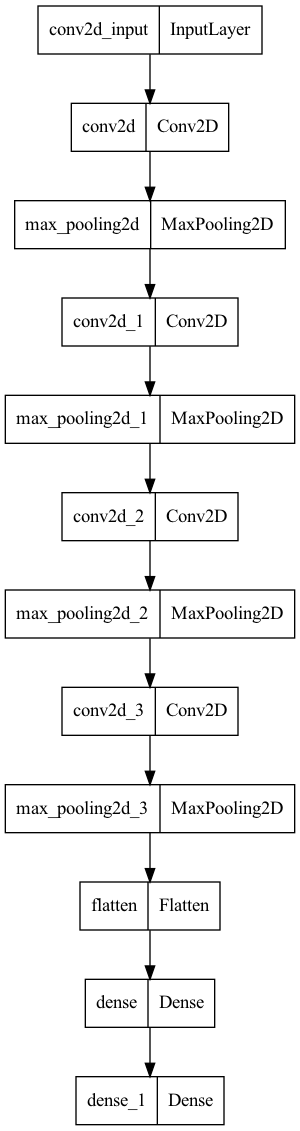

In [11]:
import pydot
keras.utils.plot_model(model)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [15]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics=['acc'])

In [16]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=50)

Epoch 1/20


/var/folders/58/j_8hz7px0l30bjvcrr05krz00000gn/T/ipykernel_63011/4170142930.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 68s 669ms/step - loss: 0.6872 - acc: 0.5385 - val_loss: 0.6664 - val_acc: 0.5930
Epoch 2/20
100/100 [==============================] - 75s 749ms/step - loss: 0.6532 - acc: 0.6130 - val_loss: 0.6264 - val_acc: 0.5960
Epoch 3/20
100/100 [==============================] - 76s 759ms/step - loss: 0.6051 - acc: 0.6685 - val_loss: 0.5631 - val_acc: 0.7250
Epoch 4/20
100/100 [==============================] - 76s 760ms/step - loss: 0.5635 - acc: 0.7105 - val_loss: 0.5306 - val_acc: 0.7340
Epoch 5/20
100/100 [==============================] - 93s 936ms/step - loss: 0.5393 - acc: 0.7240 - val_loss: 0.4940 - val_acc: 0.7590
Epoch 6/20
100/100 [==============================] - 77s 771ms/step - loss: 0.5080 - acc: 0.7515 - val_loss: 0.5117 - val_acc: 0.7370
Epoch 7/20
100/100 [==============================] - 76s 764ms/step - loss: 0.4835 - acc: 0.7595 - val_loss: 0.4569 - val_acc: 0.7830
Epoch 8/20
100/100 [==============================] - 76s 764ms/st

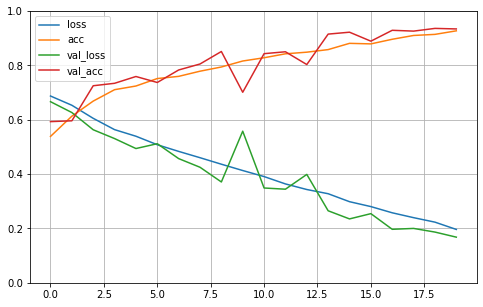

In [17]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [18]:
model.save('model_cats_vs_dogs.h5')

In [19]:
from tensorflow.keras import backend as K

K.clear_session()
del model

#### Re-Processing our data with more parameters

In [20]:

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range = 40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size = (150, 150),
            batch_size=32,
            class_mode='binary')


validation_generator = test_datagen.flow_from_directory(
            validation_dir,
            target_size = (150, 150),
            batch_size=32,
            class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Create Architecture

In [21]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu',
                       input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation="relu"))

model.add(layers.Dense(1, activation="sigmoid"))



model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics=['acc'])

In [22]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=50)

Epoch 1/100


/var/folders/58/j_8hz7px0l30bjvcrr05krz00000gn/T/ipykernel_63011/3036991046.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 73s 720ms/step - loss: 0.6943 - acc: 0.5075 - val_loss: 0.6828 - val_acc: 0.5560
Epoch 2/100
100/100 [==============================] - 64s 632ms/step - loss: 0.6756 - acc: 0.5740
Epoch 3/100
100/100 [==============================] - 64s 634ms/step - loss: 0.6529 - acc: 0.6265
Epoch 4/100
100/100 [==============================] - 66s 657ms/step - loss: 0.6248 - acc: 0.6500
Epoch 5/100
100/100 [==============================] - 69s 686ms/step - loss: 0.5915 - acc: 0.6795
Epoch 6/100
100/100 [==============================] - 67s 664ms/step - loss: 0.5616 - acc: 0.7050
Epoch 7/100
100/100 [==============================] - 65s 652ms/step - loss: 0.5307 - acc: 0.7330
Epoch 8/100
100/100 [==============================] - 66s 656ms/step - loss: 0.5081 - acc: 0.7515
Epoch 9/100
100/100 [==============================] - 66s 656ms/step - loss: 0.4909 - acc: 0.7585
Epoch 10/100
100/100 [==============================] - 81s 812ms/step - loss: 0.471

100/100 [==============================] - 72s 717ms/step - loss: 0.0354 - acc: 0.9880
Epoch 80/100
100/100 [==============================] - 68s 672ms/step - loss: 0.0349 - acc: 0.9890
Epoch 81/100
100/100 [==============================] - 68s 680ms/step - loss: 0.0308 - acc: 0.9860
Epoch 82/100
100/100 [==============================] - 10635s 107s/step - loss: 0.0356 - acc: 0.9885
Epoch 83/100
100/100 [==============================] - 70s 698ms/step - loss: 0.0317 - acc: 0.9915
Epoch 84/100
100/100 [==============================] - 68s 681ms/step - loss: 0.0293 - acc: 0.9915
Epoch 85/100
100/100 [==============================] - 598s 6s/step - loss: 0.0271 - acc: 0.9905
Epoch 86/100
100/100 [==============================] - 68s 672ms/step - loss: 0.0246 - acc: 0.9915
Epoch 87/100
100/100 [==============================] - 66s 656ms/step - loss: 0.0265 - acc: 0.9890
Epoch 88/100
100/100 [==============================] - 18182s 184s/step - loss: 0.0366 - acc: 0.9880
Epoch 89/10

In [24]:
model.save("project_cnn.h5")

(0.0, 1.0)

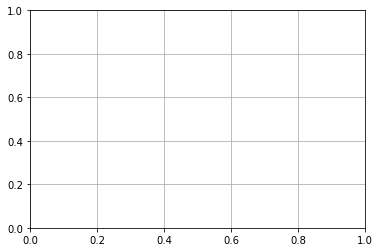

In [35]:
#pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#plt.show()

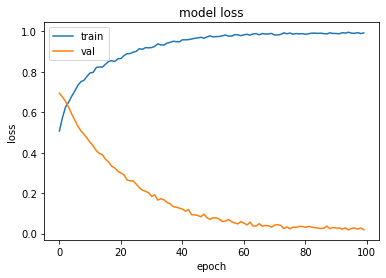

In [38]:
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Transfer Learning VGG16

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range = 40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size = (150, 150),
            batch_size=20,
            class_mode='binary')


validation_generator = test_datagen.flow_from_directory(
            validation_dir,
            target_size = (150, 150),
            batch_size=20,
            class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [29]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                    include_top=False,
                     input_shape=(150, 150, 3))

In [30]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [40]:
# conv_base.trainable = False

In [31]:
from tensorflow.keras import models
from tensorflow.keras import layers


model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


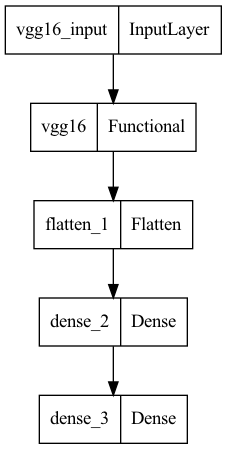

In [39]:
import pydot
keras.utils.plot_model(model)

In [41]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=2e-5),
             metrics=['acc'])

In [43]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("project_cnn-{epoch:02d}.h5")

In [ ]:
history = model.fit(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50,
        callbacks=[checkpoint_cb])

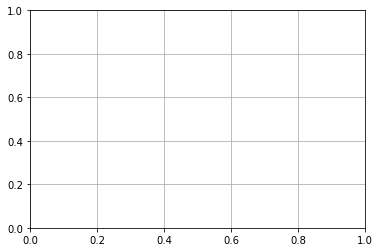

In [45]:
#pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [47]:
#hist_df = pd.DataFrame(history.history)

In [ ]:
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size = (150, 150)),
        batch_size=20,
        class_model='binary'

In [ ]:
model.evaluate_generator(test_generator, steps=50)